In [2]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ape import accounts, chain, Contract, networks, project

In [3]:
# SEE: https://gist.github.com/banteg/dcf6082ff7fc6ad51ce220146f29d9ff
networks.parse_network_choice('ethereum:mainnet:alchemy').__enter__()

<alchemy chain_id=1>

In [4]:
# mrgl v1 constants
MAINTENANCE_UNIT = int(1e6)
SECONDS_AGO = 43200  # 12 hr TWAP

In [5]:
# UNI/WETH from Feb 27, 2023 to  26, 2024
FILEPATH = "results/MarginalV1LPRunner_0x1d42064Fc4Beb5F8aAF85F4617AE8b3b5B8Bd801_250000_0.25_0.25_3.5_0_50400_0.005_17998181_19311400_2400.csv"

In [6]:
[
    _,
    pool_addr,
    maintenance,
    utilization,
    skew,
    leverage,
    rel_margin_above_safe_min,
    blocks_held,
    sqrt_price_tol,
    start,
    stop,
    step
] = re.split("_", FILEPATH[len("results/"):-len(".csv")])

In [7]:
maintenance = int(maintenance)
utilization = float(utilization)
skew = float(skew)
leverage = float(leverage)
rel_margin_above_safe_min = float(rel_margin_above_safe_min)
blocks_held = int(blocks_held)
sqrt_price_tol = float(sqrt_price_tol)
start = int(start)
stop = int(stop)
step = int(step)

In [8]:
leverage

3.5

In [9]:
# values array from backtester for marginal LP pool
# values = [liquidity, sqrtPriceX96, liquidityLocked, lpTotalLiquidity, lpAmount0, lpAmount1]
df = pd.read_csv(FILEPATH)
df

,number,timestamp,values0,values1,values2,values3,values4,values5,univ3_sqrtPriceX96,univ3_liquidity,...,_net_liquidity_liquidated_cumulative0,_net_liquidity_liquidated_cumulative1,_net_liquidity_settled_cumulative0,_net_liquidity_settled_cumulative1,_balances_pool0,_balances_pool1,_last_mrglv1_block_timestamp,_last_mrglv1_tick_cumulative,_net_liquidity_swap_fees_cumulative,_net_liquidity_position_fees_cumulative
0,17998182,1708998584,10226805916623846957733,4168010503442910833875654129,0,10226805916623746957673,194397552620084053872985,538008621233460338723,4168008784382137638332327128,1348756457373625844877604,...,0,0,0,0,0,0,-1,-1,0,0
1,18000582,1708998588,7670480545305599283587,4167684945538446847935294040,2556722172638830439092,10227202717944329718739,194420281185370240489050,537987471246382048461,4174832966775960060884034990,1348756457373625844877604,...,0,0,0,0,194065277576750292549332,552889053808695116370,1708998587,-236748,56581701727828008,327866112482406212
2,18002982,1709027524,7670499743743404731727,4167695376832776717667634751,2556722172638830439092,10227221916382135166692,194420159535830044032550,537989827683743229027,4198939390493444764294405442,1714990638571862423866014,...,0,0,0,0,194065277576750292549332,552891073624321598797,1709027523,-1704653906,75780139533276148,327866112482406212
3,18005382,1709056461,7670634839885648795376,4198873182948367358091477799,2556722172638830439092,10227357012524379229020,192979084667355752777740,542021595977263344813,4204231089501474711675342148,1665958413176292228814096,...,0,0,0,0,192985096945523816945434,555916722557499230723,1709056460,-3409129439,210876281777339797,327866112482406212
4,18007782,1709085433,7670775162980729748692,4198949995219213575614747188,2556722172638830439092,10227497335619460180964,192978202156075131445261,542038948344561510703,4208681782476437507208844991,1665958413176292228814096,...,0,0,0,0,192985096945523816945434,555931596164344408800,1709085432,-5111349957,351199376858293113,327866112482406212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,19301382,1724752468,10708538681596057067296,4888448243378506796571728060,3545778278765117556428,14254316960361035241736,231022869515911293205274,879504061360653370914,4875301928444821867630628907,323976533130863515655856,...,345290478441133548404,74124980727251886049,26788584660120699508,15231375904881642011,234087237071982364276301,906808341660800536817,1724752466,-932573553147,3554834574229818879934,10803464094282245086
544,19303782,1724781441,10718751381843618416744,4893110341361226278681782922,3545778278765117556428,14264529660608596491322,230968115431020901552184,880973575329496784961,4693924590733693082295585449,326421624029424835360987,...,345290478441133548404,74124980727251886049,26788584660120699508,15231375904881642011,234087237071982364276301,908069208032173492635,1724781439,-934187635858,3565047274477380229382,10803464094282245086
545,19306182,1724810462,10729190831949735795943,4704584952575536598475887701,3545778278765117556428,14274969110714713768441,240399436717717524603356,847650667963653154723,4685171427703644151759713962,327016644406246453261884,...,345290478441133548404,74124980727251886049,26788584660120699508,15231375904881642011,241217886504282448403220,883183568518296888614,1724810461,-935803898439,3575486724583497608581,10803464094282245086
546,19308582,1724839423,10739456685986716528329,4685939249805138538309078131,3545778278765117556428,14285234964751694400445,241529575397048358309930,844898342833165849767,4699914448871631640965677056,328647811298964781266544,...,345290478441133548404,74124980727251886049,26788584660120699508,15231375904881642011,242110422168870778712285,881265713426966212129,1724839422,-937439525394,3585752578620478340967,10803464094282245086


In [10]:
df.columns

Index(['number', 'timestamp', 'values0', 'values1', 'values2', 'values3',
       'values4', 'values5', 'univ3_sqrtPriceX96', 'univ3_liquidity',
       'univ3_feeGrowthGlobal0X128', 'univ3_feeGrowthGlobal1X128',
       'univ3_observation0_tick_cumulatives',
       'univ3_observation1_tick_cumulatives', '_token_ids0', '_token_ids1',
       '_blocks_settle0', '_blocks_settle1', '_sizes_outstanding0',
       '_sizes_outstanding1', '_margins_outstanding0', '_margins_outstanding1',
       '_debts_outstanding0', '_debts_outstanding1',
       '_debts_without_funding_outstanding0',
       '_debts_without_funding_outstanding1', '_funding_rates_outstanding0',
       '_funding_rates_outstanding1', '_amounts0_locked0', '_amounts0_locked1',
       '_amounts1_locked0', '_amounts1_locked1',
       '_positions_liquidated_cumulative0',
       '_positions_liquidated_cumulative1', '_positions_settled_cumulative0',
       '_positions_settled_cumulative1', '_sizes_liquidated_cumulative0',
       '_sizes_liq

In [11]:
# plot mrgl pool tick vs oracle time weighted average tick over time
def calc_tick_from_sqrt_price_x96(sqrt_price_x96: int) -> int:
    price = (int(sqrt_price_x96) ** 2) / (1 << 192)
    return int(np.log(price) / np.log(1.0001))

In [12]:
df['tick'] = df['values1'].apply(calc_tick_from_sqrt_price_x96)
df['tick']

0     -58900
1     -58902
2     -58902
3     -58753
4     -58752
       ...  
543   -55711
544   -55692
545   -56478
546   -56558
547   -56539
Name: tick, Length: 548, dtype: int64

In [13]:
def calc_time_weighted_average_tick(tick_cumulatives_diff: int) -> int:
    return int(tick_cumulatives_diff) // int(SECONDS_AGO)

In [14]:
# observation0 at timestamp - seconds_ago; observation1 at timestamp
df['oracle_tick'] = (df['univ3_observation1_tick_cumulatives'] - df['univ3_observation0_tick_cumulatives']).apply(calc_time_weighted_average_tick)
df['oracle_tick']

0     -58932
1     -58893
2     -58825
3     -58756
4     -58732
       ...  
543   -55796
544   -56295
545   -56600
546   -56609
547   -56511
Name: oracle_tick, Length: 548, dtype: int64

<Axes: xlabel='number'>

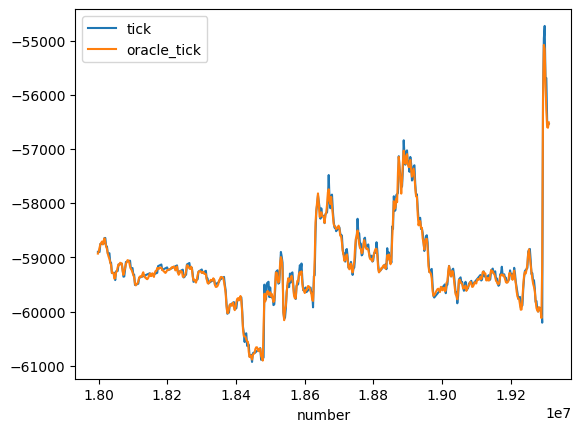

In [15]:
df.plot(x='number', y=['tick', 'oracle_tick'])

<Axes: xlabel='number'>

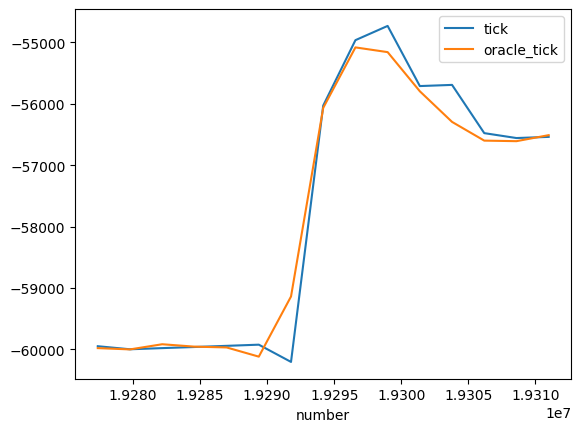

In [16]:
# zoom in to a 5 day window at end to see oracle tick timelag
# 12 hr TWAP lags so insurance mechanism for LPs must be robust to guarantee no bad debt
df[df['timestamp'] > df['timestamp'].iloc[-1] - 5 * 86400].plot(x='number', y=['tick', 'oracle_tick'])

In [17]:
# plot mrgl pool price vs oracle time weighted average price over time
def calc_price_from_tick(tick: int) -> float:
    return 1.0001 ** tick

In [18]:
df['price'] = df['tick'].apply(calc_price_from_tick)
df['price']

0      0.002768
1      0.002767
2      0.002767
3      0.002809
4      0.002809
         ...   
543    0.003807
544    0.003815
545    0.003526
546    0.003498
547    0.003505
Name: price, Length: 548, dtype: float64

In [19]:
df['oracle_price'] = df['oracle_tick'].apply(calc_price_from_tick)
df['oracle_price']

0      0.002759
1      0.002770
2      0.002789
3      0.002808
4      0.002815
         ...   
543    0.003775
544    0.003591
545    0.003484
546    0.003480
547    0.003515
Name: oracle_price, Length: 548, dtype: float64

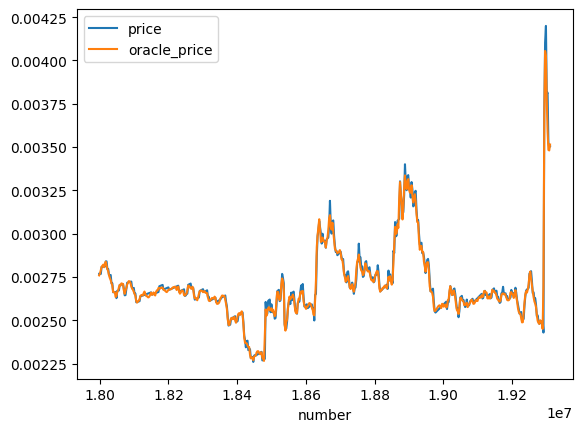

In [20]:
fp = "assets/" + FILEPATH[len("results/"):-len(".csv")] + "-prices.png"
ax = df.plot(x='number', y=['price', 'oracle_price'])
ax.get_figure().savefig(fp)

<Axes: xlabel='number'>

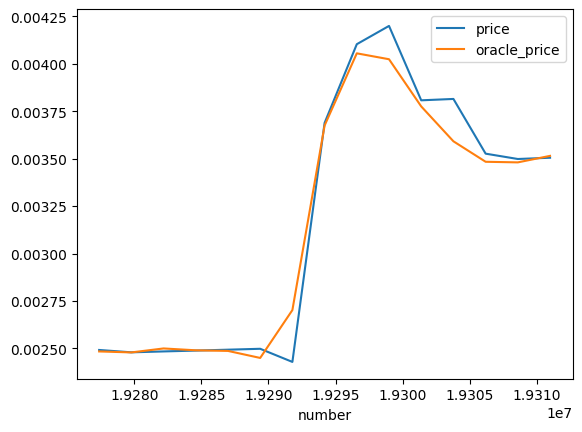

In [21]:
df[df['timestamp'] > df['timestamp'].iloc[-1] - 5 * 86400].plot(x='number', y=['price', 'oracle_price'])

In [22]:
# plot liquidity gained over time. convert to datatype first
df['lp_total_liquidity'] = df['values3'].apply(lambda v: int(v))
df['lp_amount0'] = df['values4'].apply(lambda v: int(v))
df['lp_amount1'] = df['values5'].apply(lambda v: int(v))

In [23]:
df

,number,timestamp,values0,values1,values2,values3,values4,values5,univ3_sqrtPriceX96,univ3_liquidity,...,_last_mrglv1_tick_cumulative,_net_liquidity_swap_fees_cumulative,_net_liquidity_position_fees_cumulative,tick,oracle_tick,price,oracle_price,lp_total_liquidity,lp_amount0,lp_amount1
0,17998182,1708998584,10226805916623846957733,4168010503442910833875654129,0,10226805916623746957673,194397552620084053872985,538008621233460338723,4168008784382137638332327128,1348756457373625844877604,...,-1,0,0,-58900,-58932,0.002768,0.002759,10226805916623746957673,194397552620084053872985,538008621233460338723
1,18000582,1708998588,7670480545305599283587,4167684945538446847935294040,2556722172638830439092,10227202717944329718739,194420281185370240489050,537987471246382048461,4174832966775960060884034990,1348756457373625844877604,...,-236748,56581701727828008,327866112482406212,-58902,-58893,0.002767,0.002770,10227202717944329718739,194420281185370240489050,537987471246382048461
2,18002982,1709027524,7670499743743404731727,4167695376832776717667634751,2556722172638830439092,10227221916382135166692,194420159535830044032550,537989827683743229027,4198939390493444764294405442,1714990638571862423866014,...,-1704653906,75780139533276148,327866112482406212,-58902,-58825,0.002767,0.002789,10227221916382135166692,194420159535830044032550,537989827683743229027
3,18005382,1709056461,7670634839885648795376,4198873182948367358091477799,2556722172638830439092,10227357012524379229020,192979084667355752777740,542021595977263344813,4204231089501474711675342148,1665958413176292228814096,...,-3409129439,210876281777339797,327866112482406212,-58753,-58756,0.002809,0.002808,10227357012524379229020,192979084667355752777740,542021595977263344813
4,18007782,1709085433,7670775162980729748692,4198949995219213575614747188,2556722172638830439092,10227497335619460180964,192978202156075131445261,542038948344561510703,4208681782476437507208844991,1665958413176292228814096,...,-5111349957,351199376858293113,327866112482406212,-58752,-58732,0.002809,0.002815,10227497335619460180964,192978202156075131445261,542038948344561510703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,19301382,1724752468,10708538681596057067296,4888448243378506796571728060,3545778278765117556428,14254316960361035241736,231022869515911293205274,879504061360653370914,4875301928444821867630628907,323976533130863515655856,...,-932573553147,3554834574229818879934,10803464094282245086,-55711,-55796,0.003807,0.003775,14254316960361035241736,231022869515911293205274,879504061360653370914
544,19303782,1724781441,10718751381843618416744,4893110341361226278681782922,3545778278765117556428,14264529660608596491322,230968115431020901552184,880973575329496784961,4693924590733693082295585449,326421624029424835360987,...,-934187635858,3565047274477380229382,10803464094282245086,-55692,-56295,0.003815,0.003591,14264529660608596491322,230968115431020901552184,880973575329496784961
545,19306182,1724810462,10729190831949735795943,4704584952575536598475887701,3545778278765117556428,14274969110714713768441,240399436717717524603356,847650667963653154723,4685171427703644151759713962,327016644406246453261884,...,-935803898439,3575486724583497608581,10803464094282245086,-56478,-56600,0.003526,0.003484,14274969110714713768441,240399436717717524603356,847650667963653154723
546,19308582,1724839423,10739456685986716528329,4685939249805138538309078131,3545778278765117556428,14285234964751694400445,241529575397048358309930,844898342833165849767,4699914448871631640965677056,328647811298964781266544,...,-937439525394,3585752578620478340967,10803464094282245086,-56558,-56609,0.003498,0.003480,14285234964751694400445,241529575397048358309930,844898342833165849767


In [24]:
df['net_liquidity_settled_cumulative_zero_for_one'] = df['_net_liquidity_settled_cumulative0'].apply(lambda v: int(v))
df['net_liquidity_settled_cumulative_one_for_zero'] = df['_net_liquidity_settled_cumulative1'].apply(lambda v: int(v))
df['net_liquidity_settled_cumulative'] = df['net_liquidity_settled_cumulative_zero_for_one'] + df['net_liquidity_settled_cumulative_one_for_zero']

df['net_liquidity_liquidated_cumulative_zero_for_one'] = df['_net_liquidity_liquidated_cumulative0'].apply(lambda v: int(v))
df['net_liquidity_liquidated_cumulative_one_for_zero'] = df['_net_liquidity_liquidated_cumulative1'].apply(lambda v: int(v))
df['net_liquidity_liquidated_cumulative'] = df['net_liquidity_liquidated_cumulative_zero_for_one'] + df['net_liquidity_liquidated_cumulative_one_for_zero']

df['net_liquidity_swap_fees_cumulative'] = df['_net_liquidity_swap_fees_cumulative'].apply(lambda v: int(v))
df['net_liquidity_position_fees_cumulative'] = df['_net_liquidity_position_fees_cumulative'].apply(lambda v: int(v))
df['net_liquidity_fees_cumulative'] = df['net_liquidity_swap_fees_cumulative'] + df['net_liquidity_position_fees_cumulative']

In [25]:
df['net_liquidity_total_cumulative'] = df['lp_total_liquidity'] - df['lp_total_liquidity'].iloc[0]

In [26]:
df

,number,timestamp,values0,values1,values2,values3,values4,values5,univ3_sqrtPriceX96,univ3_liquidity,...,net_liquidity_settled_cumulative_zero_for_one,net_liquidity_settled_cumulative_one_for_zero,net_liquidity_settled_cumulative,net_liquidity_liquidated_cumulative_zero_for_one,net_liquidity_liquidated_cumulative_one_for_zero,net_liquidity_liquidated_cumulative,net_liquidity_swap_fees_cumulative,net_liquidity_position_fees_cumulative,net_liquidity_fees_cumulative,net_liquidity_total_cumulative
0,17998182,1708998584,10226805916623846957733,4168010503442910833875654129,0,10226805916623746957673,194397552620084053872985,538008621233460338723,4168008784382137638332327128,1348756457373625844877604,...,0,0,0,0,0,0,0,0,0,0
1,18000582,1708998588,7670480545305599283587,4167684945538446847935294040,2556722172638830439092,10227202717944329718739,194420281185370240489050,537987471246382048461,4174832966775960060884034990,1348756457373625844877604,...,0,0,0,0,0,0,56581701727828008,327866112482406212,384447814210234220,396801320582761066
2,18002982,1709027524,7670499743743404731727,4167695376832776717667634751,2556722172638830439092,10227221916382135166692,194420159535830044032550,537989827683743229027,4198939390493444764294405442,1714990638571862423866014,...,0,0,0,0,0,0,75780139533276148,327866112482406212,403646252015682360,415999758388209019
3,18005382,1709056461,7670634839885648795376,4198873182948367358091477799,2556722172638830439092,10227357012524379229020,192979084667355752777740,542021595977263344813,4204231089501474711675342148,1665958413176292228814096,...,0,0,0,0,0,0,210876281777339797,327866112482406212,538742394259746009,551095900632271347
4,18007782,1709085433,7670775162980729748692,4198949995219213575614747188,2556722172638830439092,10227497335619460180964,192978202156075131445261,542038948344561510703,4208681782476437507208844991,1665958413176292228814096,...,0,0,0,0,0,0,351199376858293113,327866112482406212,679065489340699325,691418995713223291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,19301382,1724752468,10708538681596057067296,4888448243378506796571728060,3545778278765117556428,14254316960361035241736,231022869515911293205274,879504061360653370914,4875301928444821867630628907,323976533130863515655856,...,26788584660120699508,15231375904881642011,42019960565002341519,345290478441133548404,74124980727251886049,419415459168385434453,3554834574229818879934,10803464094282245086,3565638038324101125020,4027511043737288284063
544,19303782,1724781441,10718751381843618416744,4893110341361226278681782922,3545778278765117556428,14264529660608596491322,230968115431020901552184,880973575329496784961,4693924590733693082295585449,326421624029424835360987,...,26788584660120699508,15231375904881642011,42019960565002341519,345290478441133548404,74124980727251886049,419415459168385434453,3565047274477380229382,10803464094282245086,3575850738571662474468,4037723743984849533649
545,19306182,1724810462,10729190831949735795943,4704584952575536598475887701,3545778278765117556428,14274969110714713768441,240399436717717524603356,847650667963653154723,4685171427703644151759713962,327016644406246453261884,...,26788584660120699508,15231375904881642011,42019960565002341519,345290478441133548404,74124980727251886049,419415459168385434453,3575486724583497608581,10803464094282245086,3586290188677779853667,4048163194090966810768
546,19308582,1724839423,10739456685986716528329,4685939249805138538309078131,3545778278765117556428,14285234964751694400445,241529575397048358309930,844898342833165849767,4699914448871631640965677056,328647811298964781266544,...,26788584660120699508,15231375904881642011,42019960565002341519,345290478441133548404,74124980727251886049,419415459168385434453,3585752578620478340967,10803464094282245086,3596556042714760586053,4058429048127947442772


In [27]:
# put in yield terms relative to initial liquidity
df['lp_total_liquidity'].iloc[0]

10226805916623746957673

In [28]:
df['yield_liquidity_total'] = (df['lp_total_liquidity'] / df['lp_total_liquidity'].iloc[0] - 1)
df['yield_liquidity_fees'] = (df['net_liquidity_fees_cumulative'] / df['lp_total_liquidity'].iloc[0])
df['yield_liquidity_settled'] = (df['net_liquidity_settled_cumulative'] / df['lp_total_liquidity'].iloc[0])
df['yield_liquidity_liquidated'] = (df['net_liquidity_liquidated_cumulative'] / df['lp_total_liquidity'].iloc[0])

In [29]:
df

,number,timestamp,values0,values1,values2,values3,values4,values5,univ3_sqrtPriceX96,univ3_liquidity,...,net_liquidity_liquidated_cumulative_one_for_zero,net_liquidity_liquidated_cumulative,net_liquidity_swap_fees_cumulative,net_liquidity_position_fees_cumulative,net_liquidity_fees_cumulative,net_liquidity_total_cumulative,yield_liquidity_total,yield_liquidity_fees,yield_liquidity_settled,yield_liquidity_liquidated
0,17998182,1708998584,10226805916623846957733,4168010503442910833875654129,0,10226805916623746957673,194397552620084053872985,538008621233460338723,4168008784382137638332327128,1348756457373625844877604,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,18000582,1708998588,7670480545305599283587,4167684945538446847935294040,2556722172638830439092,10227202717944329718739,194420281185370240489050,537987471246382048461,4174832966775960060884034990,1348756457373625844877604,...,0,0,56581701727828008,327866112482406212,384447814210234220,396801320582761066,0.000039,0.000038,0.0,0.0
2,18002982,1709027524,7670499743743404731727,4167695376832776717667634751,2556722172638830439092,10227221916382135166692,194420159535830044032550,537989827683743229027,4198939390493444764294405442,1714990638571862423866014,...,0,0,75780139533276148,327866112482406212,403646252015682360,415999758388209019,0.000041,0.000039,0.0,0.0
3,18005382,1709056461,7670634839885648795376,4198873182948367358091477799,2556722172638830439092,10227357012524379229020,192979084667355752777740,542021595977263344813,4204231089501474711675342148,1665958413176292228814096,...,0,0,210876281777339797,327866112482406212,538742394259746009,551095900632271347,0.000054,0.000053,0.0,0.0
4,18007782,1709085433,7670775162980729748692,4198949995219213575614747188,2556722172638830439092,10227497335619460180964,192978202156075131445261,542038948344561510703,4208681782476437507208844991,1665958413176292228814096,...,0,0,351199376858293113,327866112482406212,679065489340699325,691418995713223291,0.000068,0.000066,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,19301382,1724752468,10708538681596057067296,4888448243378506796571728060,3545778278765117556428,14254316960361035241736,231022869515911293205274,879504061360653370914,4875301928444821867630628907,323976533130863515655856,...,74124980727251886049,419415459168385434453,3554834574229818879934,10803464094282245086,3565638038324101125020,4027511043737288284063,0.393819,0.348656,0.004109,0.041011
544,19303782,1724781441,10718751381843618416744,4893110341361226278681782922,3545778278765117556428,14264529660608596491322,230968115431020901552184,880973575329496784961,4693924590733693082295585449,326421624029424835360987,...,74124980727251886049,419415459168385434453,3565047274477380229382,10803464094282245086,3575850738571662474468,4037723743984849533649,0.394818,0.349655,0.004109,0.041011
545,19306182,1724810462,10729190831949735795943,4704584952575536598475887701,3545778278765117556428,14274969110714713768441,240399436717717524603356,847650667963653154723,4685171427703644151759713962,327016644406246453261884,...,74124980727251886049,419415459168385434453,3575486724583497608581,10803464094282245086,3586290188677779853667,4048163194090966810768,0.395838,0.350675,0.004109,0.041011
546,19308582,1724839423,10739456685986716528329,4685939249805138538309078131,3545778278765117556428,14285234964751694400445,241529575397048358309930,844898342833165849767,4699914448871631640965677056,328647811298964781266544,...,74124980727251886049,419415459168385434453,3585752578620478340967,10803464094282245086,3596556042714760586053,4058429048127947442772,0.396842,0.351679,0.004109,0.041011


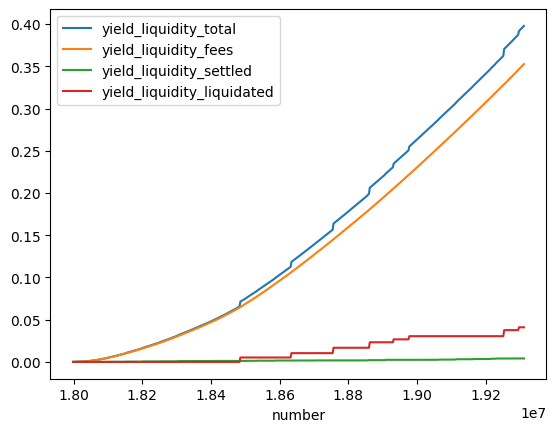

In [30]:
fp = "assets/" + FILEPATH[len("results/"):-len(".csv")] + "-yields.png"
ax = df.plot(x='number', y=['yield_liquidity_total', 'yield_liquidity_fees', 'yield_liquidity_settled', 'yield_liquidity_liquidated'])
ax.get_figure().savefig(fp)

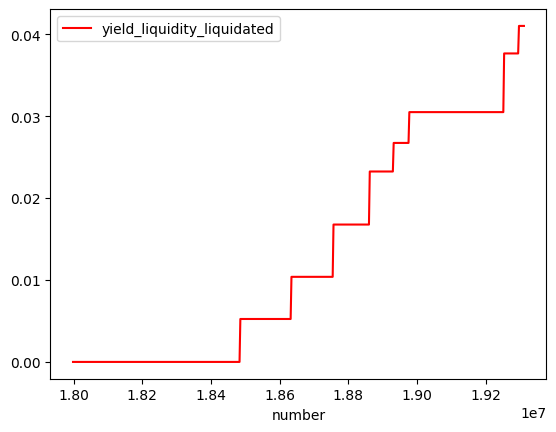

In [31]:
# look at net liquidity liquidated over time and check no shortfalls due to liquidations (i.e. no bad debt)
fp = "assets/" + FILEPATH[len("results/"):-len(".csv")] + "-yields-liquidated.png"
ax = df.plot(x='number', y=['yield_liquidity_liquidated'], color=['r'])
ax.get_figure().savefig(fp)

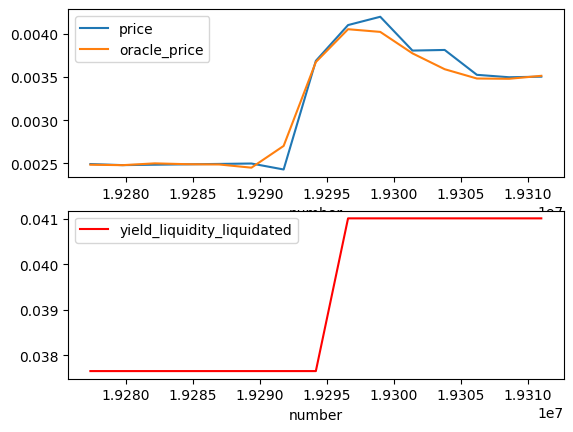

In [32]:
# focus on last 5 day window ...
fp = "assets/" + FILEPATH[len("results/"):-len(".csv")] + "-price_vs_liquidations_yield_T-5.png"
fig, ax = plt.subplots(2, 1)
df[df['timestamp'] > df['timestamp'].iloc[-1] - 5 * 86400].plot(x='number', y=['price', 'oracle_price'], ax=ax[0])
df[df['timestamp'] > df['timestamp'].iloc[-1] - 5 * 86400].plot(x='number', y=['yield_liquidity_liquidated'], color=['r'], ax=ax[1])
fig.savefig(fp)

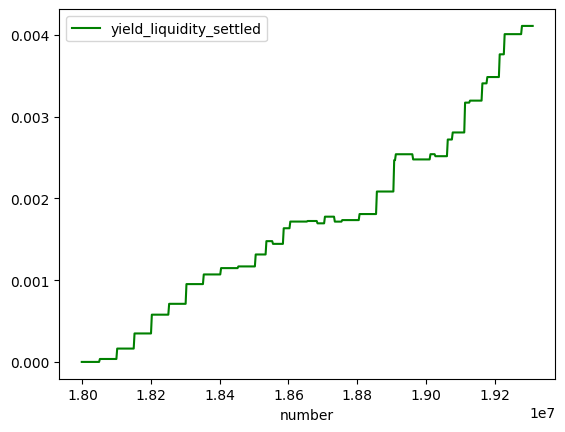

In [33]:
# and for settled? dependent on funding rates. order of mag smaller than contribution from liquidations
fp = "assets/" + FILEPATH[len("results/"):-len(".csv")] + "-yields-settled.png"
ax = df.plot(x='number', y=['yield_liquidity_settled'], color=['g'])
ax.get_figure().savefig(fp)

In [34]:
def calc_reserves_from_liquidity_sqrt_price_x96(sqrt_price_x96: int, liquidity: int) -> (int, int):
    amount0 = (int(liquidity) << 96) // int(sqrt_price_x96)
    amount1 = (int(liquidity) * int(sqrt_price_x96)) // (1 << 96)
    return (amount0, amount1)

In [35]:
# check actual token balances in the pool can cover pool liquidity post-settle, liquidate of outstanding positions
df['balance0_pool'] = df['_balances_pool0'].apply(lambda v: int(v))
df['balance1_pool'] = df['_balances_pool1'].apply(lambda v: int(v))

In [36]:
df["liquidity"] = df["values0"].apply(lambda v: int(v))
df["sqrtPriceX96"] = df["values1"].apply(lambda v: int(v))

In [37]:
df['reserve0'] = df.apply(lambda x: calc_reserves_from_liquidity_sqrt_price_x96(x.sqrtPriceX96, x.liquidity)[0], axis=1)
df['reserve1'] = df.apply(lambda x: calc_reserves_from_liquidity_sqrt_price_x96(x.sqrtPriceX96, x.liquidity)[1], axis=1)

In [38]:
df['amounts0_locked_zero_for_one'] = df['_amounts0_locked0'].apply(lambda v: int(v))
df['amounts1_locked_zero_for_one'] = df['_amounts1_locked0'].apply(lambda v: int(v))
df['amounts0_locked_one_for_zero'] = df['_amounts0_locked1'].apply(lambda v: int(v))
df['amounts1_locked_one_for_zero'] = df['_amounts1_locked1'].apply(lambda v: int(v))

In [39]:
df['collaterals_zero_for_one'] = df['_sizes_outstanding0'].apply(lambda v: int(v)) + df['_margins_outstanding0'].apply(lambda v: int(v))
df['debts_zero_for_one'] = df['_debts_outstanding0'].apply(lambda v: int(v))
df['collaterals_one_for_zero'] = df['_sizes_outstanding1'].apply(lambda v: int(v)) + df['_margins_outstanding1'].apply(lambda v: int(v))
df['debts_one_for_zero'] = df['_debts_outstanding1'].apply(lambda v: int(v))

In [40]:
df['reserve0_liquidated'] = df['reserve0'] + df['amounts0_locked_zero_for_one'] + df['amounts0_locked_one_for_zero']
df['reserve1_liquidated'] = df['reserve1'] + df['amounts1_locked_zero_for_one'] + df['amounts1_locked_one_for_zero']

In [41]:
df.filter(['reserve0_liquidated', 'balance0_pool', 'reserve1_liquidated', 'balance1_pool'])

,reserve0_liquidated,balance0_pool,reserve1_liquidated,balance1_pool
0,194397552620085954736958,0,538008621233465599495,0
1,194065277576750292549339,194065277576750292549332,552889053808695116364,552889053808695116370
2,194065277576750292549339,194065277576750292549332,552891073624321598789,552891073624321598797
3,192985096945523816945441,192985096945523816945434,555916722557499230712,555916722557499230723
4,192985096945523816945441,192985096945523816945434,555931596164344408787,555931596164344408800
...,...,...,...,...
543,234087237071982364276397,234087237071982364276301,906808341660800535258,906808341660800536817
544,234087237071982364276397,234087237071982364276301,908069208032173491072,908069208032173492635
545,241217886504282448403316,241217886504282448403220,883183568518296887048,883183568518296888614
546,242110422168870778712381,242110422168870778712285,881265713426966210558,881265713426966212129


In [42]:
# should be some dust left over in pool or very little negative amounts (won't be stuck due to transfer helper lib)
df['net_balance0_pool'] = df['balance0_pool'] - df['reserve0_liquidated']
df['net_balance1_pool'] = df['balance1_pool'] - df['reserve1_liquidated']

In [43]:
df['rel_balance0_pool'] = df['net_balance0_pool'] / df['reserve0_liquidated']
df['rel_balance1_pool'] = df['net_balance1_pool'] / df['reserve1_liquidated']

In [44]:
# dust for balance check
df.filter(['net_balance0_pool', 'net_balance1_pool', 'rel_balance0_pool', 'rel_balance1_pool'])

,net_balance0_pool,net_balance1_pool,rel_balance0_pool,rel_balance1_pool
0,-194397552620085954736958,-538008621233465599495,-1.0,-1.0
1,-7,6,-0.0,0.0
2,-7,8,-0.0,0.0
3,-7,11,-0.0,0.0
4,-7,13,-0.0,0.0
...,...,...,...,...
543,-96,1559,-0.0,0.0
544,-96,1563,-0.0,0.0
545,-96,1566,-0.0,0.0
546,-96,1571,-0.0,0.0


In [45]:
print(f"last excess reserves (relative): {(df['rel_balance0_pool'].iloc[-1], df['rel_balance1_pool'].iloc[-1])}")

last excess reserves (relative): (-3.965132898452446e-22, 1.782477553579814e-18)


<Axes: xlabel='number'>

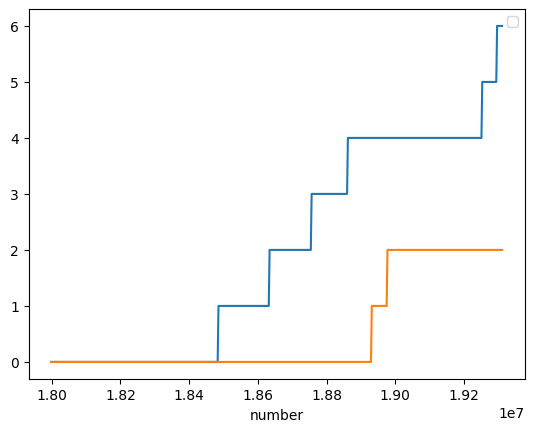

In [46]:
df.plot(x='number', y=['_positions_liquidated_cumulative0', '_positions_liquidated_cumulative1'])

In [47]:
df['sizes_outstanding_zero_for_one'] = df['_sizes_outstanding0'].apply(lambda v: int(v))
df['sizes_outstanding_one_for_zero'] = df['_sizes_outstanding1'].apply(lambda v: int(v))

In [48]:
# relative to initial total liquidity x, y amounts
df['rel_sizes_outstanding_zero_for_one'] = df['sizes_outstanding_zero_for_one'] / df['lp_amount1'].iloc[0]  # size in token1
df['rel_sizes_outstanding_one_for_zero'] = df['sizes_outstanding_one_for_zero'] / df['lp_amount0'].iloc[0]  # size in token0

<Axes: xlabel='number'>

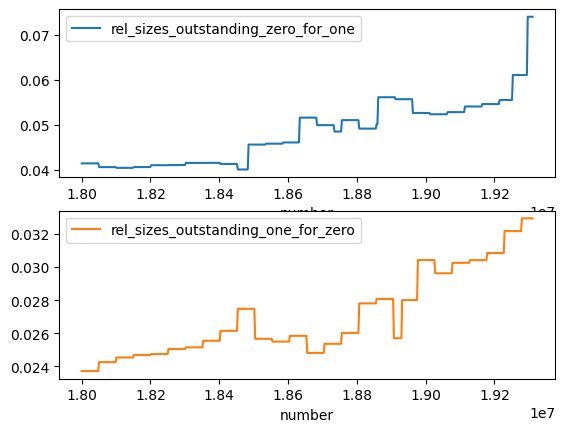

In [49]:
fig, ax = plt.subplots(2, 1)
df[1:].plot(x='number', y=['rel_sizes_outstanding_zero_for_one'], ax=ax[0], color=['C0'])
df[1:].plot(x='number', y=['rel_sizes_outstanding_one_for_zero'], ax=ax[1], color=['C1'])

In [50]:
df['sizes_liquidated_cumulative_zero_for_one'] = df['_sizes_liquidated_cumulative0'].apply(lambda v: int(v))
df['sizes_liquidated_cumulative_one_for_zero'] = df['_sizes_liquidated_cumulative1'].apply(lambda v: int(v))
df['sizes_settled_cumulative_zero_for_one'] = df['_sizes_settled_cumulative0'].apply(lambda v: int(v))
df['sizes_settled_cumulative_one_for_zero'] = df['_sizes_settled_cumulative1'].apply(lambda v: int(v))

In [51]:
# relative to initial total liquidity x, y amounts
df['rel_sizes_liquidated_cumulative_zero_for_one'] = df['sizes_liquidated_cumulative_zero_for_one'] / df['lp_amount1'].iloc[0]  # size in token1
df['rel_sizes_liquidated_cumulative_one_for_zero'] = df['sizes_liquidated_cumulative_one_for_zero'] / df['lp_amount0'].iloc[0]  # size in token0
df['rel_sizes_settled_cumulative_zero_for_one'] = df['sizes_settled_cumulative_zero_for_one'] / df['lp_amount1'].iloc[0]  # size in token1
df['rel_sizes_settled_cumulative_one_for_zero'] = df['sizes_settled_cumulative_one_for_zero'] / df['lp_amount0'].iloc[0]  # size in token0

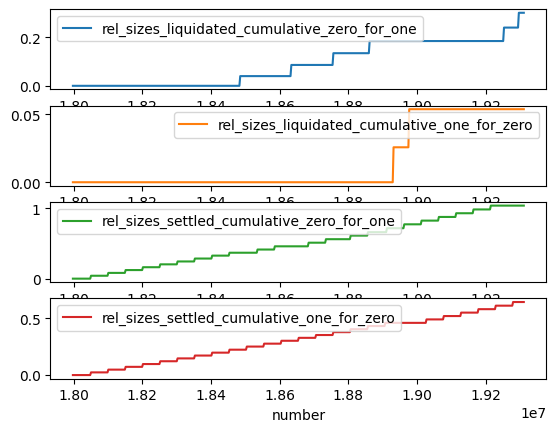

In [52]:
fp = "assets/" + FILEPATH[len("results/"):-len(".csv")] + "-rel-sizes-liquidated-settled.png"
fig, ax = plt.subplots(4, 1)
df.plot(x='number', y=['rel_sizes_liquidated_cumulative_zero_for_one'], ax=ax[0], color='C0')
df.plot(x='number', y=['rel_sizes_liquidated_cumulative_one_for_zero'], ax=ax[1], color='C1')
df.plot(x='number', y=['rel_sizes_settled_cumulative_zero_for_one'], ax=ax[2], color='C2')
df.plot(x='number', y=['rel_sizes_settled_cumulative_one_for_zero'], ax=ax[3], color='C3')
fig.savefig(fp)

In [53]:
# examine yields in token0 or token1 terms ...
df['lp_value0_total'] = (2 * df['lp_total_liquidity'] * (1 << 96)) // df['sqrtPriceX96']
df['lp_value1_total'] = (2 * df['lp_total_liquidity'] * df['sqrtPriceX96']) // (1 << 96)

In [54]:
df['yield_value0_total'] = df['lp_value0_total'] / df['lp_value0_total'].iloc[0] - 1
df['yield_value1_total'] = df['lp_value1_total'] / df['lp_value1_total'].iloc[0] - 1

In [55]:
df.filter(['lp_value0_total', 'lp_value1_total', 'yield_value0_total', 'yield_value1_total'])

,lp_value0_total,lp_value1_total,yield_value0_total,yield_value1_total
0,388795105240168107745971,1076017242466920677447,0.0,0.0
1,388840562370740480978100,1075974942492764096923,0.000117,-0.000039
2,388840319071660088065101,1075979655367486458054,0.000116,-0.000035
3,385958169334711505555480,1084043191954526689626,-0.007297,0.007459
4,385956404312150262890522,1084077896689123021406,-0.007301,0.007491
...,...,...,...,...
543,462045739031822586410548,1759008122721306741828,0.188404,0.63474
544,461936230862041803104369,1761947150658993569922,0.188123,0.637471
545,480798873435435049206713,1695301335927306309447,0.236638,0.575534
546,483059150794096716619861,1689796685666331699534,0.242452,0.570418


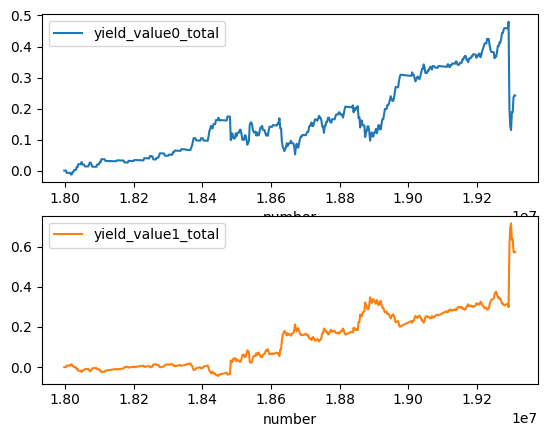

In [56]:
# yield in value terms ...
fp = "assets/" + FILEPATH[len("results/"):-len(".csv")] + "-yields-value.png"
fig, ax = plt.subplots(2, 1)
df.plot(x='number', y=['yield_value0_total'], ax=ax[0], color='C0')
df.plot(x='number', y=['yield_value1_total'], ax=ax[1], color='C1')
fig.savefig(fp)

In [57]:
# benchmark against passive hold ...
df['passive_value0_total'] = df['lp_amount0'].iloc[0] + df['lp_amount1'].iloc[0] / df['price']
df['passive_value1_total'] = df['lp_amount0'].iloc[0] * df['price'] + df['lp_amount1'].iloc[0]

In [58]:
df['yield_value0_total_lp_to_passive'] = df['lp_value0_total'] / df['passive_value0_total'] - 1
df['yield_value1_total_lp_to_passive'] = df['lp_value1_total'] / df['passive_value1_total'] - 1

df['yield_value0_total_lp_to_passive'] = df['lp_value0_total'] / df['passive_value0_total'] - 1
df['yield_value1_total_lp_to_passive'] = df['lp_value1_total'] / df['passive_value1_total'] - 1

In [59]:
df.filter(['passive_value0_total', 'passive_value1_total', 'yield_value0_total_lp_to_passive', 'yield_value1_total_lp_to_passive'])

,passive_value0_total,passive_value1_total,yield_value0_total_lp_to_passive,yield_value1_total_lp_to_passive
0,388779461286455238721536.0,1076060541671180337152.0,0.00004,-0.00004
1,388818339612007558283264.0,1075952947426498445312.0,0.000057,0.00002
2,388818339612007558283264.0,1075952947426498445312.0,0.000057,0.000025
3,385943087466229983608832.0,1084027923329422852096.0,0.000039,0.000014
4,385923934828009290203136.0,1084082525259632476160.0,0.000084,-0.000004
...,...,...,...,...
543,335705392094657225162752.0,1278148443943790968832.0,0.376343,0.376216
544,335437175496714498342912.0,1279555975963520008192.0,0.377117,0.376999
545,346969601244264256241664.0,1223504819255376871424.0,0.385709,0.385611
546,348195011469480808153088.0,1218042999166231642112.0,0.387324,0.387305


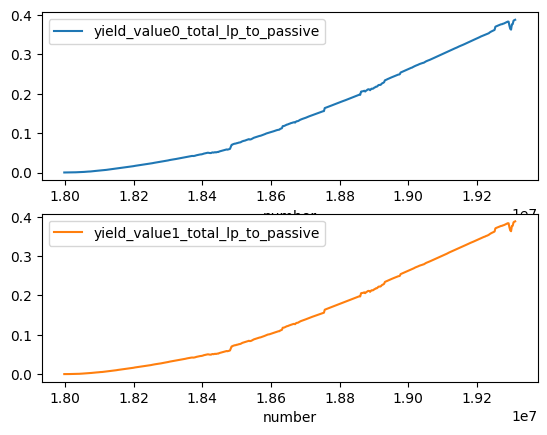

In [60]:
# similar yield increases to liquidity terms but with differences due to IL
fp = "assets/" + FILEPATH[len("results/"):-len(".csv")] + "-yields-value-rel-to-passive.png"
fig, ax = plt.subplots(2, 1)
df.plot(x='number', y=['yield_value0_total_lp_to_passive'], ax=ax[0], color='C0')
df.plot(x='number', y=['yield_value1_total_lp_to_passive'], ax=ax[1], color='C1')
fig.savefig(fp)

In [61]:
# yield loss to impermanent loss
def calc_impermanent_loss(sqrt_ratio: float) -> float:
    return (2 * sqrt_ratio) / (sqrt_ratio **2 + 1) - 1

In [62]:
sqrt_ratio_end = df['sqrtPriceX96'].iloc[-1] / df['sqrtPriceX96'].iloc[0]
calc_impermanent_loss(sqrt_ratio_end)

-0.0069314210153238465

In [63]:
# plot IL (approx)
df['yield_il'] = df['yield_value1_total_lp_to_passive'] - df['yield_liquidity_total']

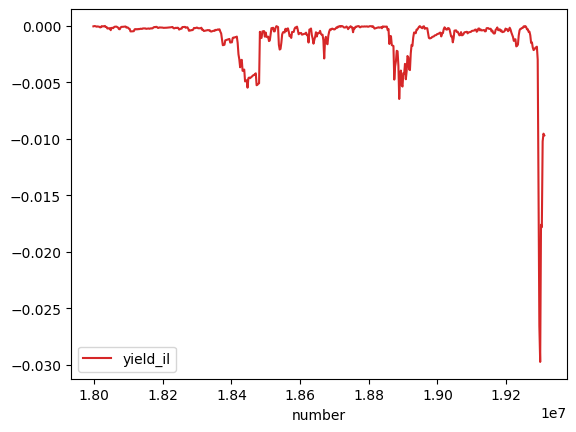

In [64]:
fp = "assets/" + FILEPATH[len("results/"):-len(".csv")] + "-yields-il.png"
ax = df.plot(x='number', y=['yield_il'], color='C3')
ax.get_figure().savefig(fp)

In [65]:
# check out total volumes on both sides (count based at settlement/liquidation given columns)
df['rel_volumes_closed_cumulative_zero_for_one'] = df['rel_sizes_liquidated_cumulative_zero_for_one'] + df['rel_sizes_settled_cumulative_zero_for_one']
df['rel_volumes_closed_cumulative_one_for_zero'] = df['rel_sizes_liquidated_cumulative_one_for_zero'] + df['rel_sizes_settled_cumulative_one_for_zero']

In [66]:
df.filter(['rel_volumes_closed_cumulative_zero_for_one', 'rel_volumes_closed_cumulative_one_for_zero'])

,rel_volumes_closed_cumulative_zero_for_one,rel_volumes_closed_cumulative_one_for_zero
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
543,1.341475,0.697903
544,1.341475,0.697903
545,1.341475,0.697903
546,1.341475,0.697903


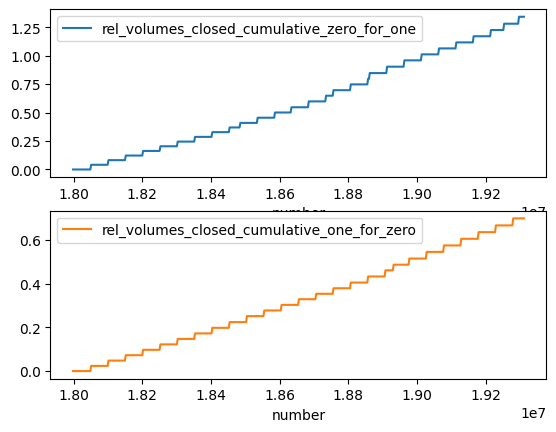

In [67]:
# cumulative volumes relative to initial TVL
fp = "assets/" + FILEPATH[len("results/"):-len(".csv")] + "-rel_volumes_cumulative.png"
fig, ax = plt.subplots(2, 1)
df.plot(x='number', y=['rel_volumes_closed_cumulative_zero_for_one'], ax=ax[0], color='C0')
df.plot(x='number', y=['rel_volumes_closed_cumulative_one_for_zero'], ax=ax[1], color='C1')
fig.savefig(fp)

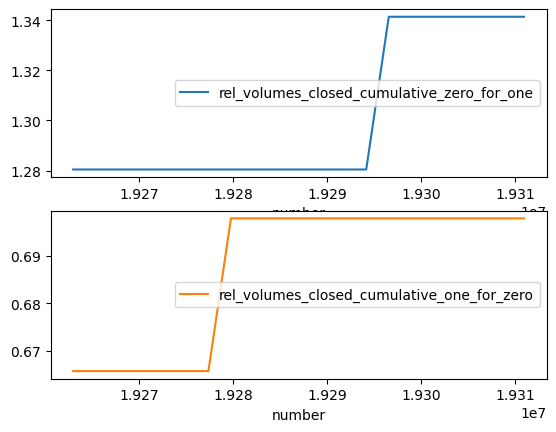

In [68]:
# zoom in over last blocks held period for sim to show turn over
fp = "assets/" + FILEPATH[len("results/"):-len(".csv")] + "-rel_volumes_cumulative_T-blocks_held.png"
fig, ax = plt.subplots(2, 1)
df[df['timestamp'] > df['timestamp'].iloc[-1] - 12 * blocks_held].plot(x='number', y=['rel_volumes_closed_cumulative_zero_for_one'], ax=ax[0], color='C0')
df[df['timestamp'] > df['timestamp'].iloc[-1] - 12 * blocks_held].plot(x='number', y=['rel_volumes_closed_cumulative_one_for_zero'], ax=ax[1], color='C1')
fig.savefig(fp)

In [69]:
# calculate slippage amounts paid by traders on opened positions
df

,number,timestamp,values0,values1,values2,values3,values4,values5,univ3_sqrtPriceX96,univ3_liquidity,...,lp_value1_total,yield_value0_total,yield_value1_total,passive_value0_total,passive_value1_total,yield_value0_total_lp_to_passive,yield_value1_total_lp_to_passive,yield_il,rel_volumes_closed_cumulative_zero_for_one,rel_volumes_closed_cumulative_one_for_zero
0,17998182,1708998584,10226805916623846957733,4168010503442910833875654129,0,10226805916623746957673,194397552620084053872985,538008621233460338723,4168008784382137638332327128,1348756457373625844877604,...,1076017242466920677447,0.0,0.0,388779461286455238721536.0,1076060541671180337152.0,0.00004,-0.00004,-0.00004,0.0,0.0
1,18000582,1708998588,7670480545305599283587,4167684945538446847935294040,2556722172638830439092,10227202717944329718739,194420281185370240489050,537987471246382048461,4174832966775960060884034990,1348756457373625844877604,...,1075974942492764096923,0.000117,-0.000039,388818339612007558283264.0,1075952947426498445312.0,0.000057,0.00002,-0.000018,0.0,0.0
2,18002982,1709027524,7670499743743404731727,4167695376832776717667634751,2556722172638830439092,10227221916382135166692,194420159535830044032550,537989827683743229027,4198939390493444764294405442,1714990638571862423866014,...,1075979655367486458054,0.000116,-0.000035,388818339612007558283264.0,1075952947426498445312.0,0.000057,0.000025,-0.000016,0.0,0.0
3,18005382,1709056461,7670634839885648795376,4198873182948367358091477799,2556722172638830439092,10227357012524379229020,192979084667355752777740,542021595977263344813,4204231089501474711675342148,1665958413176292228814096,...,1084043191954526689626,-0.007297,0.007459,385943087466229983608832.0,1084027923329422852096.0,0.000039,0.000014,-0.00004,0.0,0.0
4,18007782,1709085433,7670775162980729748692,4198949995219213575614747188,2556722172638830439092,10227497335619460180964,192978202156075131445261,542038948344561510703,4208681782476437507208844991,1665958413176292228814096,...,1084077896689123021406,-0.007301,0.007491,385923934828009290203136.0,1084082525259632476160.0,0.000084,-0.000004,-0.000072,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,19301382,1724752468,10708538681596057067296,4888448243378506796571728060,3545778278765117556428,14254316960361035241736,231022869515911293205274,879504061360653370914,4875301928444821867630628907,323976533130863515655856,...,1759008122721306741828,0.188404,0.63474,335705392094657225162752.0,1278148443943790968832.0,0.376343,0.376216,-0.017603,1.341475,0.697903
544,19303782,1724781441,10718751381843618416744,4893110341361226278681782922,3545778278765117556428,14264529660608596491322,230968115431020901552184,880973575329496784961,4693924590733693082295585449,326421624029424835360987,...,1761947150658993569922,0.188123,0.637471,335437175496714498342912.0,1279555975963520008192.0,0.377117,0.376999,-0.017819,1.341475,0.697903
545,19306182,1724810462,10729190831949735795943,4704584952575536598475887701,3545778278765117556428,14274969110714713768441,240399436717717524603356,847650667963653154723,4685171427703644151759713962,327016644406246453261884,...,1695301335927306309447,0.236638,0.575534,346969601244264256241664.0,1223504819255376871424.0,0.385709,0.385611,-0.010228,1.341475,0.697903
546,19308582,1724839423,10739456685986716528329,4685939249805138538309078131,3545778278765117556428,14285234964751694400445,241529575397048358309930,844898342833165849767,4699914448871631640965677056,328647811298964781266544,...,1689796685666331699534,0.242452,0.570418,348195011469480808153088.0,1218042999166231642112.0,0.387324,0.387305,-0.009538,1.341475,0.697903


In [70]:
df['sizes_zero_for_one'] = df['_sizes_outstanding0'].apply(lambda v: int(v))
df['sizes_one_for_zero'] = df['_sizes_outstanding1'].apply(lambda v: int(v))
df['margins_zero_for_one'] = df['_margins_outstanding0'].apply(lambda v: int(v))
df['margins_one_for_zero'] = df['_margins_outstanding1'].apply(lambda v: int(v))

In [71]:
df.filter(['sizes_zero_for_one', 'debts_zero_for_one', 'margins_zero_for_one', 'sizes_one_for_zero', 'debts_one_for_zero', 'margins_one_for_zero', 'price'])

,sizes_zero_for_one,debts_zero_for_one,margins_zero_for_one,sizes_one_for_zero,debts_one_for_zero,margins_one_for_zero,price
0,0,0,0,0,0,0,0.002768
1,22263477407769042444,8391674788789819579198,8905390963107616768,4610960797143788102297,12052247400151771431,1844384318857515106304,0.002767
2,22263477407769042444,8392513956268698561155,8905390963107616768,4610960797143788102297,12051042295922179213,1844384318857515106304,0.002767
3,22263477407769042444,8397130877639422927019,8905390963107616768,4610960797143788102297,12044416376244815874,1844384318857515106304,0.002809
4,22263477407769042444,8397550723687416088997,8905390963107616768,4610960797143788102297,12043814200588801493,1844384318857515106304,0.002809
...,...,...,...,...,...,...,...
543,39831818752404394207,9721857809957798791891,15932727500961759232,6403869738367077358624,16416239232151874312,2561547895346831032320,0.003807
544,39831818752404394207,9715540971412911022662,15932727500961759232,6403869738367077358624,16426091438455399669,2561547895346831032320,0.003815
545,39831818752404394207,9676758363548608671280,15932727500961759232,6403869738367077358624,16491924090162450830,2561547895346831032320,0.003526
546,39831818752404394207,9672405019524449843017,15932727500961759232,6403869738367077358624,16499346754850278343,2561547895346831032320,0.003498


In [72]:
# pnl on open position is (size / (debt * price) - 1) for zeroForOne = true and (size * price / debt - 1) for zeroForOne = false
def pnl(x) -> (float, float):
    if x.margins_zero_for_one == 0 or x.margins_one_for_zero == 0:
            return (0, 0)
    p01 = (x.margins_zero_for_one + (x.sizes_zero_for_one - x.debts_zero_for_one * x.price)) / x.margins_zero_for_one - 1
    p10 = (x.margins_one_for_zero + (x.sizes_one_for_zero - x.debts_one_for_zero / x.price)) / x.margins_one_for_zero - 1
    return (p01, p10)

In [73]:
def effective_leverage(x) -> (float, float):
    if x.margins_zero_for_one == 0 or x.margins_one_for_zero == 0:
            return (0, 0)
    l01 = (x.margins_zero_for_one + x.debts_zero_for_one * x.price) / x.margins_zero_for_one
    l10 = (x.margins_one_for_zero + x.debts_one_for_zero / x.price) / x.margins_one_for_zero
    return (l01, l10)

In [74]:
leverage

3.5

In [75]:
# check should be = leverage - 1 if leverage was user input
df[1:]['sizes_zero_for_one'] / df[1:]['margins_zero_for_one']

1      2.5
2      2.5
3      2.5
4      2.5
5      2.5
      ... 
543    2.5
544    2.5
545    2.5
546    2.5
547    2.5
Length: 547, dtype: object

In [76]:
df[1:]['sizes_one_for_zero'] / df[1:]['margins_one_for_zero']

1      2.5
2      2.5
3      2.5
4      2.5
5      2.5
      ... 
543    2.5
544    2.5
545    2.5
546    2.5
547    2.5
Length: 547, dtype: object

In [77]:
df['pnl_zero_for_one'] = df.apply(lambda x: pnl(x)[0], axis=1)
df['pnl_one_for_zero'] = df.apply(lambda x: pnl(x)[1], axis=1)
df['effective_leverage_zero_for_one'] = df.apply(lambda x: effective_leverage(x)[0], axis=1)
df['effective_leverage_one_for_zero'] = df.apply(lambda x: effective_leverage(x)[1], axis=1)

In [78]:
df.filter(['pnl_zero_for_one', 'pnl_one_for_zero', 'effective_leverage_zero_for_one', 'effective_leverage_one_for_zero'])

,pnl_zero_for_one,pnl_one_for_zero,effective_leverage_zero_for_one,effective_leverage_one_for_zero
0,0.000000,0.000000,0.000000,0.000000
1,-0.107607,0.138597,3.607607,3.361403
2,-0.107868,0.138833,3.607868,3.361167
3,-0.148470,0.175031,3.648470,3.324969
4,-0.148868,0.175380,3.648868,3.324620
...,...,...,...,...
543,0.176824,0.816752,3.323176,2.683248
544,0.173918,0.818938,3.326082,2.681062
545,0.358323,0.674194,3.141677,2.825806
546,0.376343,0.658702,3.123657,2.841298


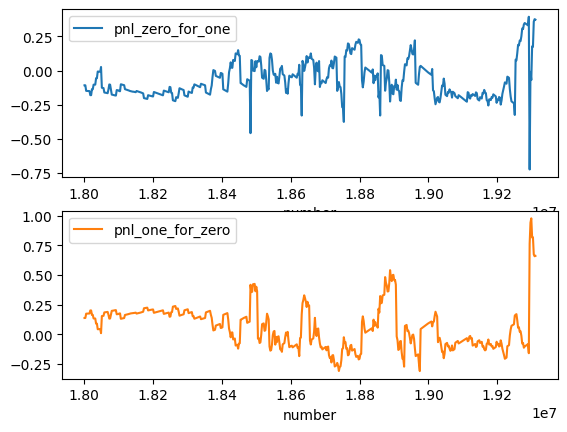

In [79]:
# pnl paid out to positions relative to initial margin
# compared with net liquidity gains from settlement show safety for pool LPs due to physical settlement
fp = "assets/" + FILEPATH[len("results/"):-len(".csv")] + "-position_pnl.png"
fig, ax = plt.subplots(2, 1)
df[1:].plot(x='number', y=['pnl_zero_for_one'], ax=ax[0], color='C0')
df[1:].plot(x='number', y=['pnl_one_for_zero'], ax=ax[1], color='C1')
fig.savefig(fp)

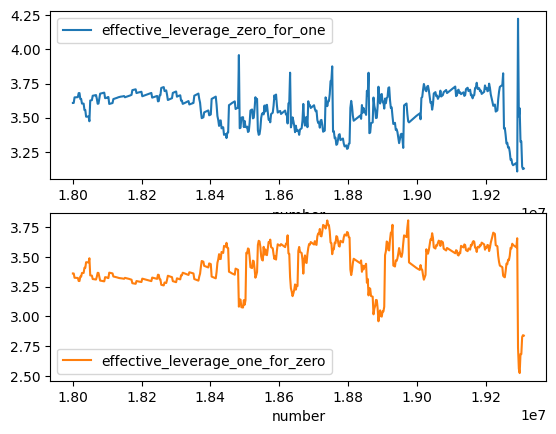

In [80]:
# effective leverage on positions relative to initial margin accounting for slippage increases to debt
fp = "assets/" + FILEPATH[len("results/"):-len(".csv")] + "-position_effective_leverage.png"
fig, ax = plt.subplots(2, 1)
df[1:].plot(x='number', y=['effective_leverage_zero_for_one'], ax=ax[0], color='C0')
df[1:].plot(x='number', y=['effective_leverage_one_for_zero'], ax=ax[1], color='C1')
fig.savefig(fp)